Populating the interactive namespace from numpy and matplotlib


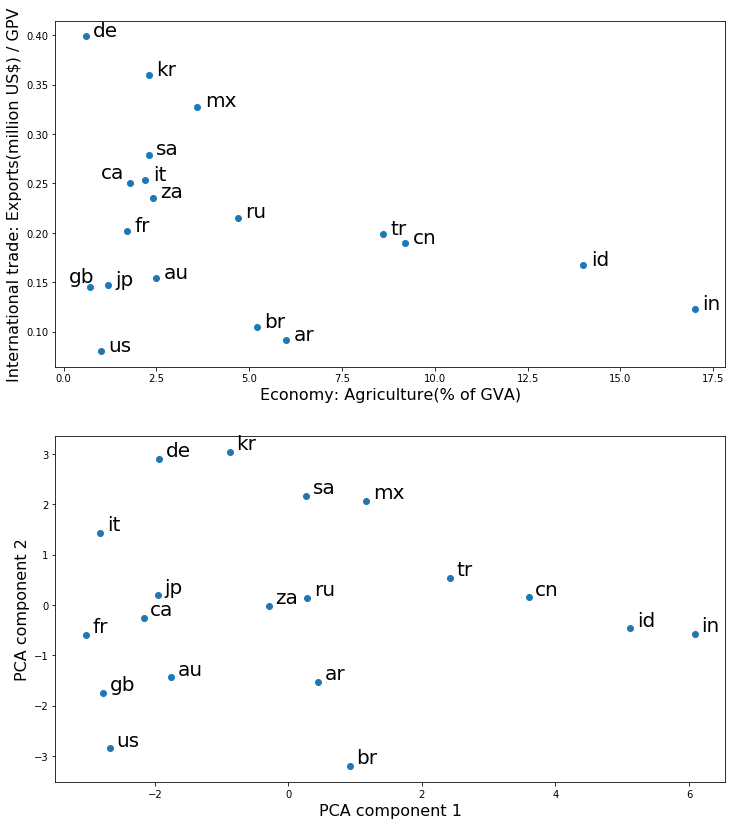

In [1]:
from linselect import FwdSelect
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
%pylab inline


# LOAD THE DATA
df = pd.read_csv('g20.csv', index_col=0)
X = df.values
countries = df.index.values

# FEATURE SELECTION PLOT
selector = FwdSelect()
selector.fit(X)
x, y = X[:, selector.ordered_features[:2]].T


fig, axes = plt.subplots(2, 1, figsize=(12,14))
axes[0].plot(x, y, 'o')
axes[0].set_xlabel(df.columns[selector.ordered_features[0]], fontsize=16)
axes[0].set_ylabel(df.columns[selector.ordered_features[1]], fontsize=16)

# annotations -- a bit of care here to avoid overlaps.
positions = zip(*[x + 0.2, y])
positions[17] = list(positions[17])
positions[17][0] -= 0.75
positions[17][1] += 0.005
positions[3] = list(positions[3])
positions[3][0] -= 1
positions[3][1] += 0.005

for i, txt in enumerate(x):
    axes[0].annotate(countries[i], positions[i], fontsize=20)
    
# PRINCIPAL COMPONENT ANALYSIS PLOT
pca = PCA()
s = StandardScaler()
x, y  = pca.fit_transform(s.fit_transform(X)).T[:2]

axes[1].plot(x, -y, 'o')
axes[1].set_xlabel('PCA component 1', fontsize=16)
axes[1].set_ylabel('PCA component 2', fontsize=16)
for i, txt in enumerate(x):
    axes[1].annotate(countries[i], (x[i] + 0.1, - y[i] + 0.05), fontsize=20)